<img src=https://mma.prnewswire.com/media/777397/Validere_Technologies_Inc__Validere_raises__7M_in_funding_to_bri.jpg width=500>

<h1><center>Crude Blend Distillation Profile

In [1]:
from blend import *

import matplotlib.pyplot as plt
%matplotlib notebook

# 1 - Load the list of crude oils

In [2]:
crudes_list = pd.read_csv('crudes_list.csv').drop('Unnamed: 0', axis=1)

In [3]:
crudes_list.tail()

,name,abbr
55,Surmont Heavy Blend,SHB
56,Surmont Mix A,SMA
57,Albian Heavy Synthetic,AHS
58,Suncor Synthetic H,OSH
59,Mixed Sweet Blend (Superior),MSW(S)


# 2 - Create a blend of two crude oils

In [4]:
name_a = 'Federated'
name_b = 'Shell Synthetic Light'
frac_a = 0.5
fname = 'crudes_list.csv'

In [5]:
my_blend = Blend(name_a=name_a, name_b=name_b, frac_a=frac_a, fname=fname)
blend_df = my_blend.htsd_blend

### 2.1 - Get the distillation profile of each crude oil

In [6]:
abbr_a = str(crudes_list[crudes_list['name'].str.startswith(name_a)]['abbr'].values[0])
abbr_b = str(crudes_list[crudes_list['name'].str.startswith(name_b)]['abbr'].values[0])

In [7]:
crude_a = pd.read_csv(f'data/htsd_{name_a.replace(" ", "_")}_{abbr_a}.csv')

# Fill the NaN values in 'T_recent [C]'
fill_nan(crude_a, 'T_recent [C]')

In [8]:
crude_b = pd.read_csv(f'data/htsd_{name_b.replace(" ", "_")}_{abbr_b}.csv')

# Fill the NaN values in 'T_recent [C]'
fill_nan(crude_b, 'T_recent [C]')

### 2.2 - Plot the distillation profile of the blend along with both crude oils

<IPython.core.display.Javascript object>


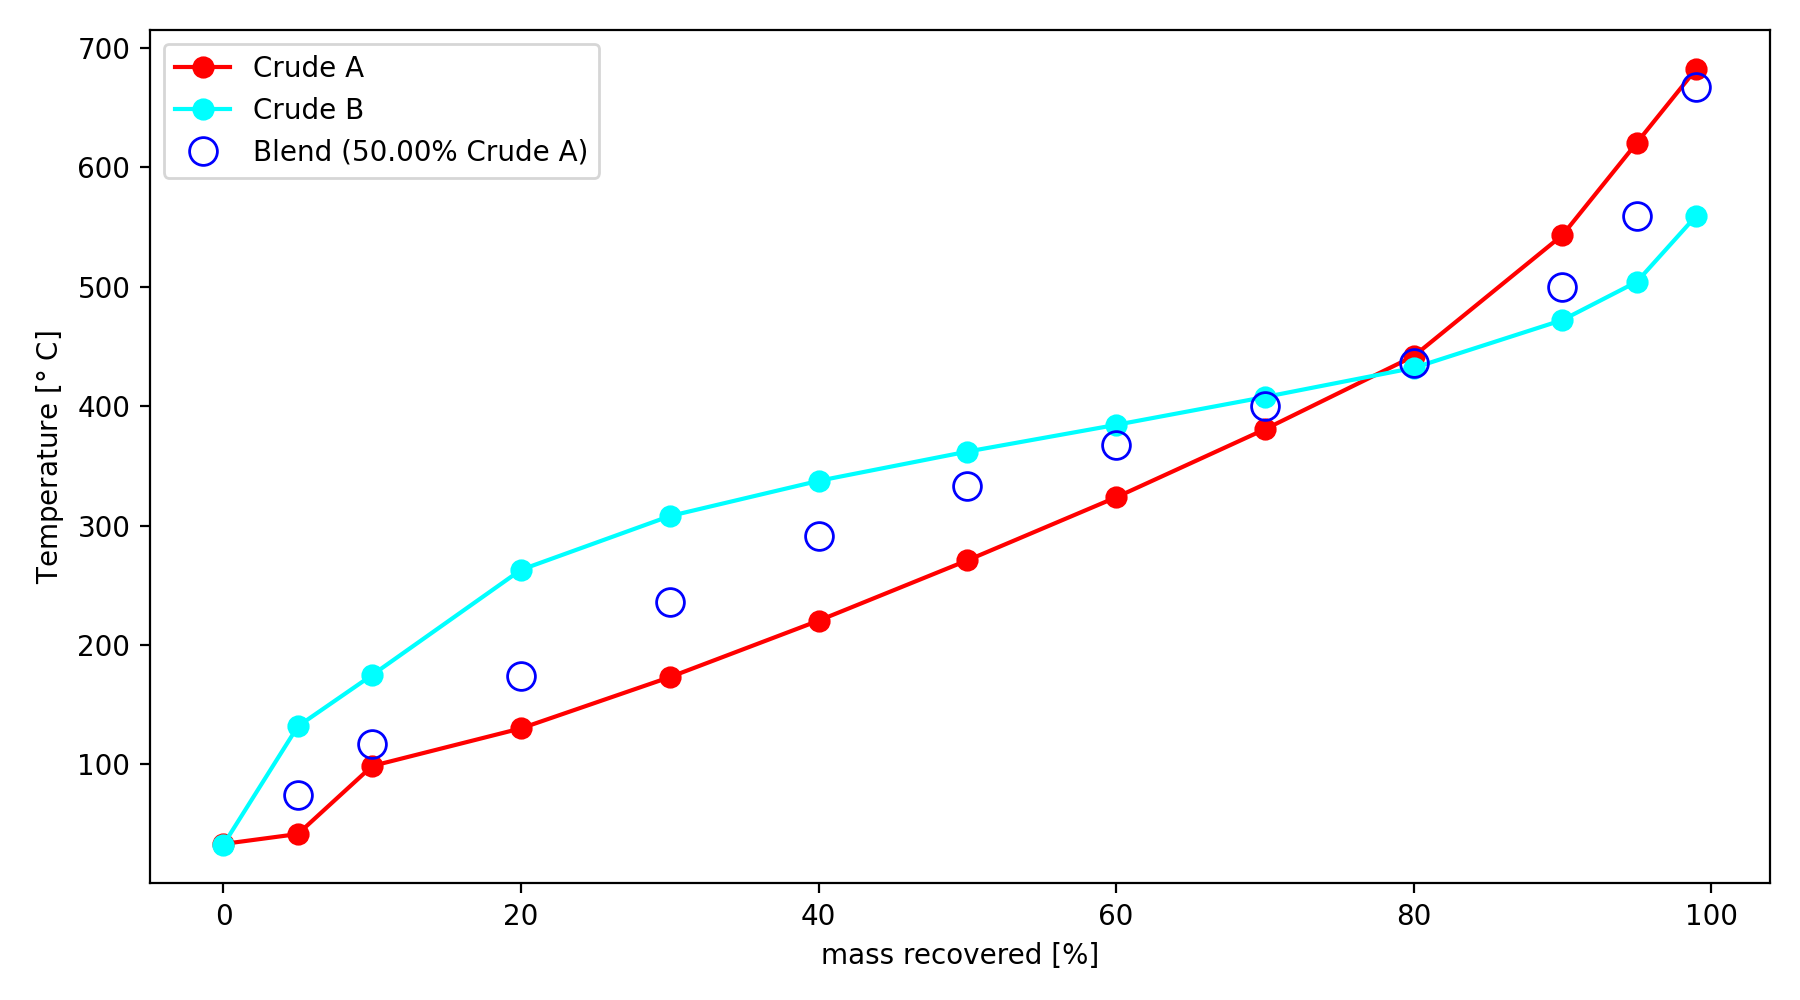

In [9]:
fig = plt.figure(figsize=(9,5))

plt.plot (crude_a['mass [%]'], crude_a['T_recent [C]'], marker='o', ms=7, ls='-', color='red', label='Crude A')
plt.plot (crude_b['mass [%]'], crude_b['T_recent [C]'], marker='o', ms=7, ls='-', color='cyan', label='Crude B')

plt.plot (blend_df['mass [%]'], blend_df['T_recent [C]'], marker='o', ms=10, mfc='none',
          ls='', color='blue', label=f'Blend ({(frac_a*100):.2f}% Crude A)')
plt.xlabel('mass recovered [%]')
plt.ylabel('Temperature [$\degree$ C]')
plt.legend()
plt.tight_layout()
plt.show()

# 3 - Tests

### 3.1 - Test 1

* __If frac_a is closer to 1 => We expect the distillation profile of the blend to be closer to that of the Crude A__

In [10]:
name_a = 'Federated'
name_b = 'Shell Synthetic Light'
frac_a = 0.85
fname = 'crudes_list.csv'

my_blend = Blend(name_a=name_a, name_b=name_b, frac_a=frac_a, fname=fname)
blend_df = my_blend.htsd_blend

<IPython.core.display.Javascript object>


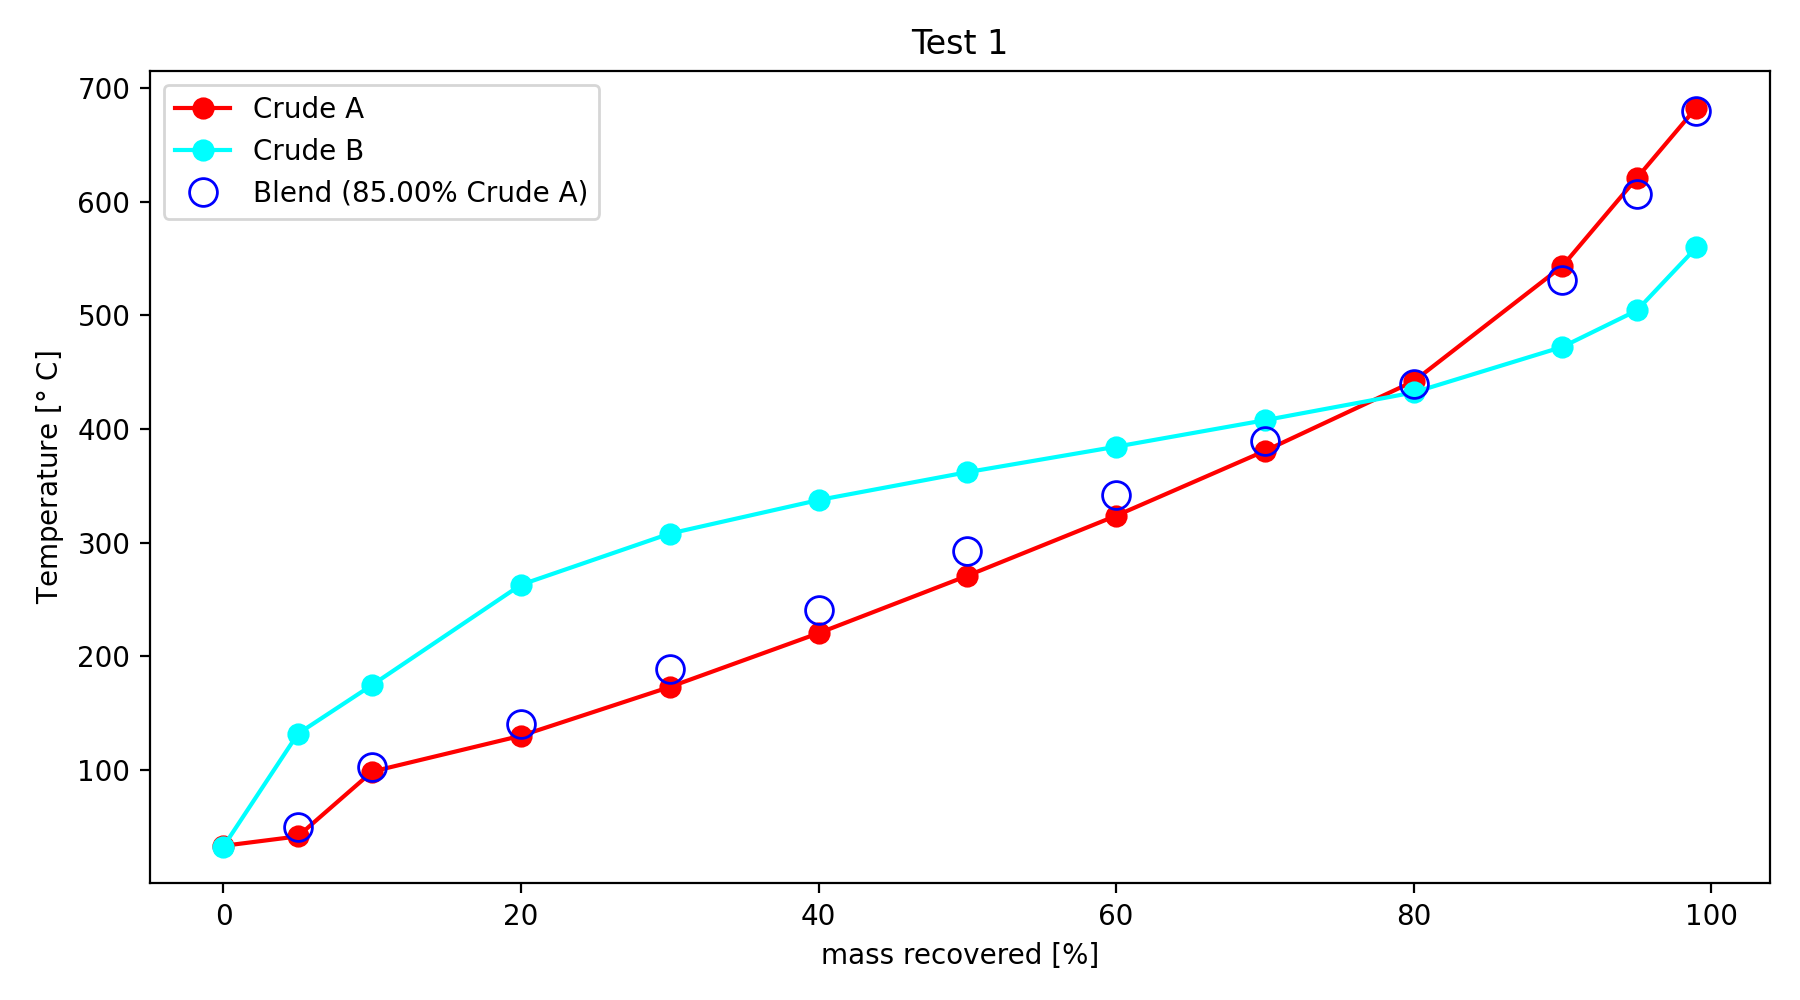

In [11]:
fig = plt.figure(figsize=(9,5))

plt.title('Test 1')

plt.plot (crude_a['mass [%]'], crude_a['T_recent [C]'], marker='o', ms=7, ls='-', color='red', label='Crude A')
plt.plot (crude_b['mass [%]'], crude_b['T_recent [C]'], marker='o', ms=7, ls='-', color='cyan', label='Crude B')

plt.plot (blend_df['mass [%]'], blend_df['T_recent [C]'], marker='o', ms=10, mfc='none',
          ls='', color='blue', label=f'Blend ({(frac_a*100):.2f}% Crude A)')
plt.xlabel('mass recovered [%]')
plt.ylabel('Temperature [$\degree$ C]')
plt.legend()
plt.tight_layout()
plt.show()

### 3.2 - Test 2

* __If frac_a is closer to 0 => We expect the distillation profile of the blend to be closer to that of the Crude B__

In [12]:
name_a = 'Federated'
name_b = 'Shell Synthetic Light'
frac_a = 0.15
fname = 'crudes_list.csv'

my_blend = Blend(name_a=name_a, name_b=name_b, frac_a=frac_a, fname=fname)
blend_df = my_blend.htsd_blend

<IPython.core.display.Javascript object>


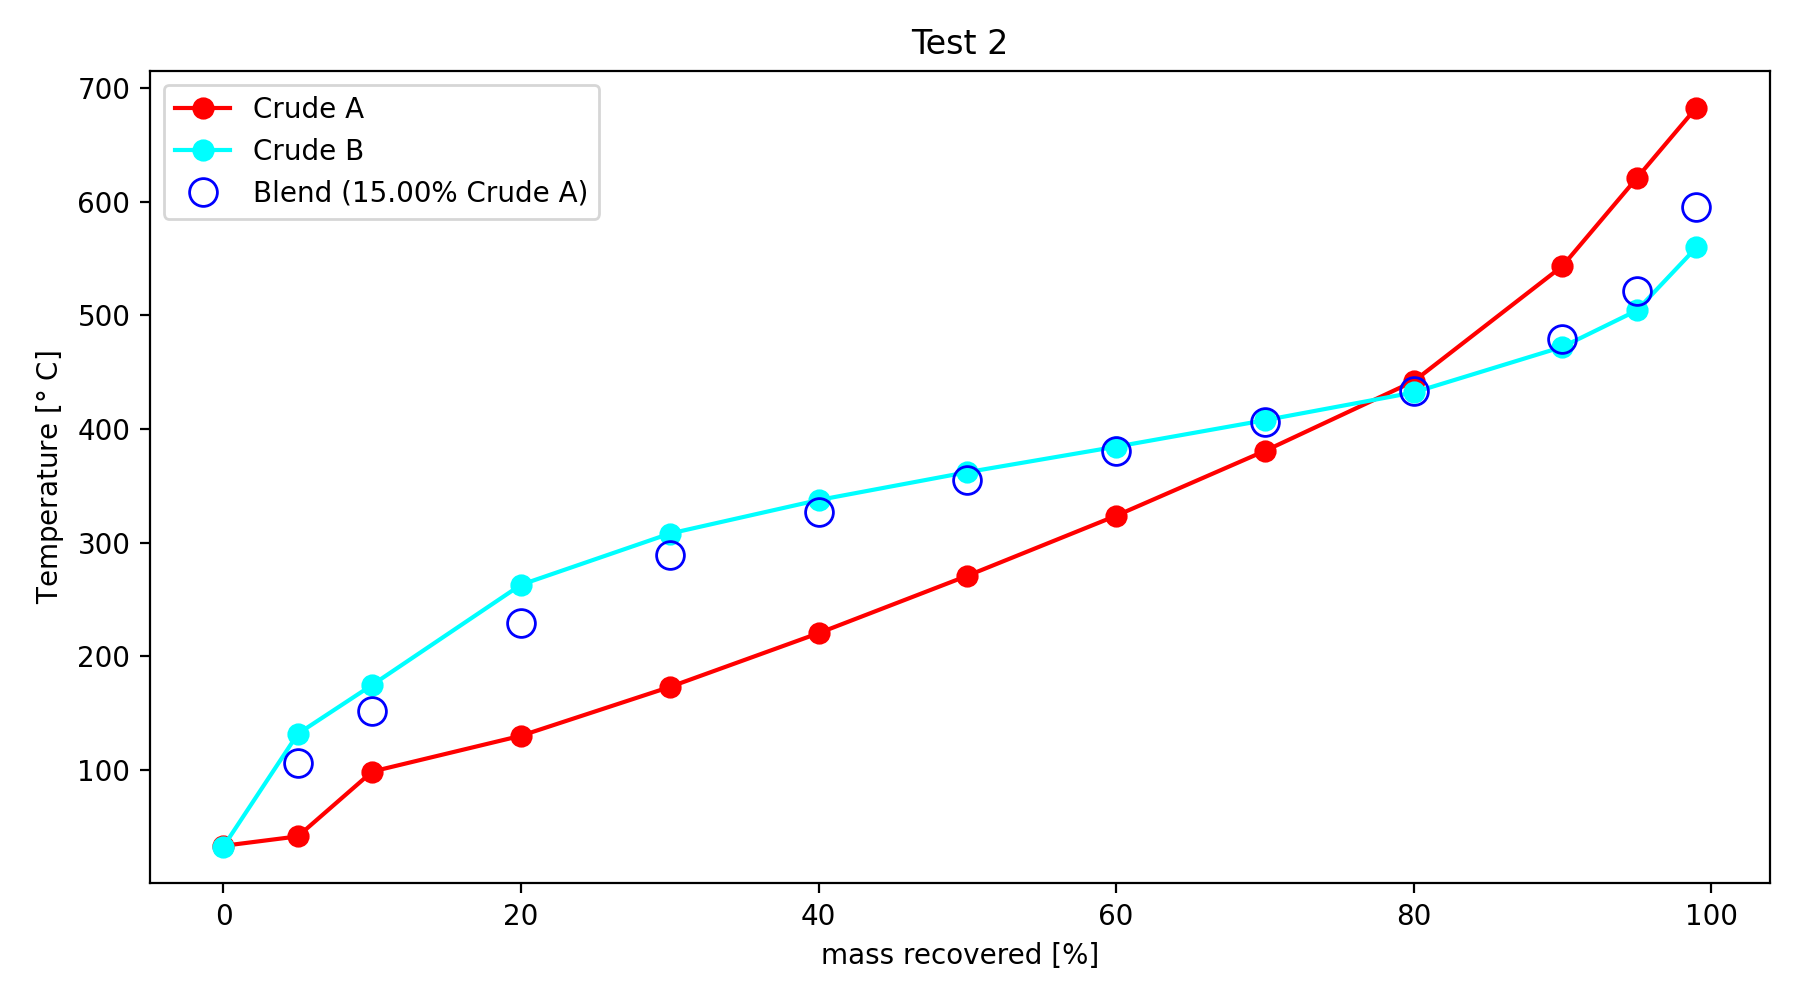

In [13]:
fig = plt.figure(figsize=(9,5))

plt.title('Test 2')

plt.plot (crude_a['mass [%]'], crude_a['T_recent [C]'], marker='o', ms=7, ls='-', color='red', label='Crude A')
plt.plot (crude_b['mass [%]'], crude_b['T_recent [C]'], marker='o', ms=7, ls='-', color='cyan', label='Crude B')

plt.plot (blend_df['mass [%]'], blend_df['T_recent [C]'], marker='o', ms=10, mfc='none',
          ls='', color='blue', label=f'Blend ({(frac_a*100):.2f}% Crude A)')
plt.xlabel('mass recovered [%]')
plt.ylabel('Temperature [$\degree$ C]')
plt.legend()
plt.tight_layout()
plt.show()

### 3.3 - Test 3

* __If frac_a = 1 => We expect the distillation profile of the blend to be exactly the same as that of the Crude A__

In [14]:
name_a = 'Federated'
name_b = 'Shell Synthetic Light'
frac_a = 1.
fname = 'crudes_list.csv'

my_blend = Blend(name_a=name_a, name_b=name_b, frac_a=frac_a, fname=fname)
blend_df = my_blend.htsd_blend

<IPython.core.display.Javascript object>


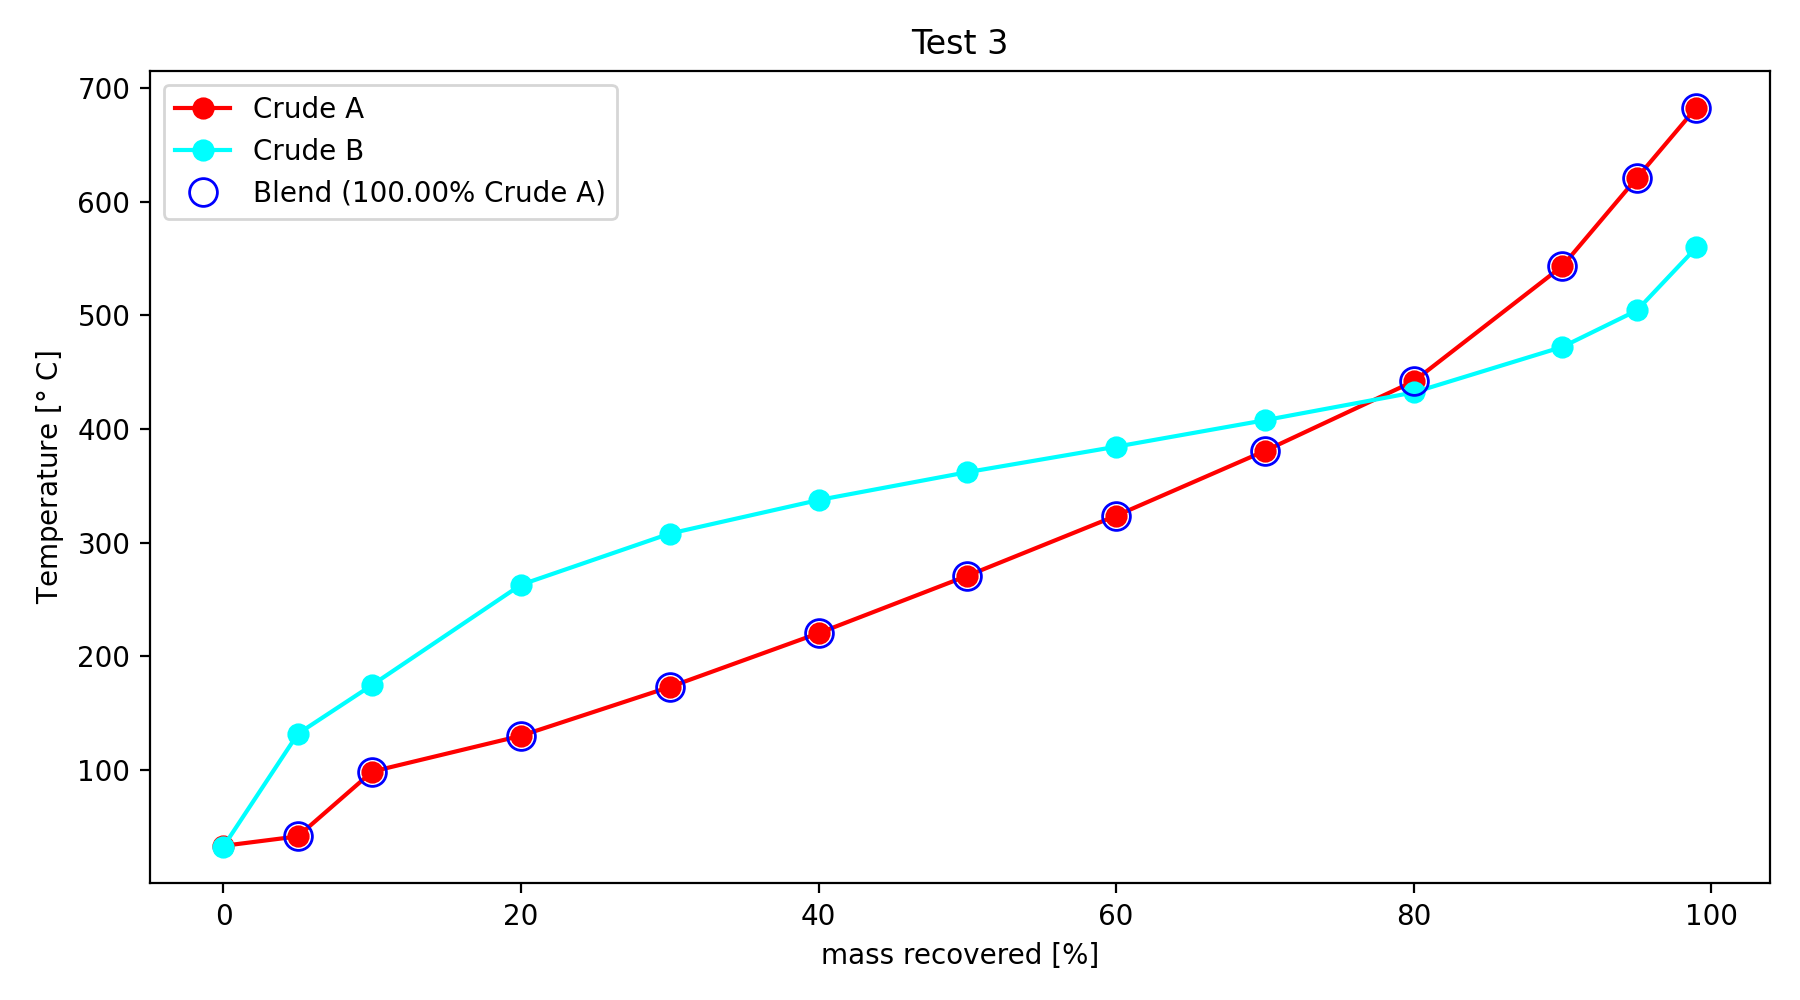

In [15]:
fig = plt.figure(figsize=(9,5))

plt.title('Test 3')

plt.plot (crude_a['mass [%]'], crude_a['T_recent [C]'], marker='o', ms=7, ls='-', color='red', label='Crude A')
plt.plot (crude_b['mass [%]'], crude_b['T_recent [C]'], marker='o', ms=7, ls='-', color='cyan', label='Crude B')

plt.plot (blend_df['mass [%]'], blend_df['T_recent [C]'], marker='o', ms=10, mfc='none',
          ls='', color='blue', label=f'Blend ({(frac_a*100):.2f}% Crude A)')
plt.xlabel('mass recovered [%]')
plt.ylabel('Temperature [$\degree$ C]')
plt.legend()
plt.tight_layout()
plt.show()

### 3.4 - Test 4

* __If frac_a = 0 => We expect the distillation profile of the blend to be exactly the same as that of the Crude B__

In [16]:
name_a = 'Federated'
name_b = 'Shell Synthetic Light'
# frac_a=0 gives problem with the interpolation
frac_a = 0.000001
fname = 'crudes_list.csv'

my_blend = Blend(name_a=name_a, name_b=name_b, frac_a=frac_a, fname=fname)
blend_df = my_blend.htsd_blend

<IPython.core.display.Javascript object>


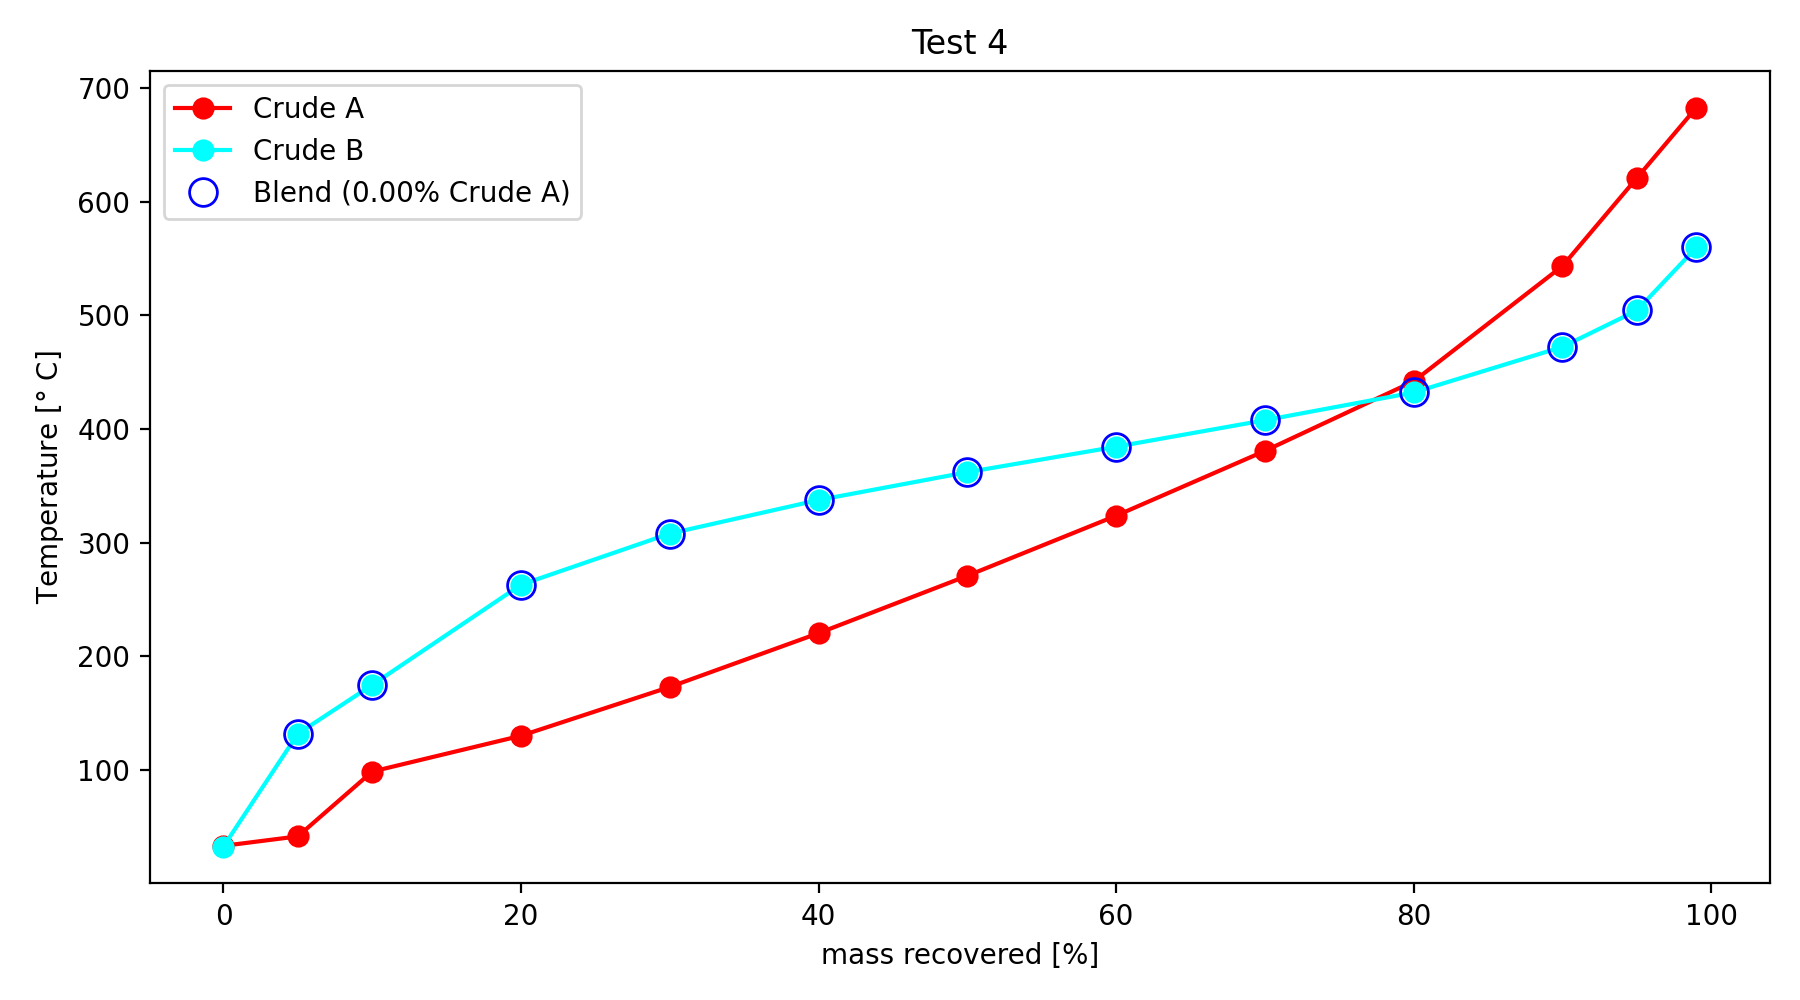

In [17]:
fig = plt.figure(figsize=(9,5))

plt.title('Test 4')

plt.plot (crude_a['mass [%]'], crude_a['T_recent [C]'], marker='o', ms=7, ls='-', color='red', label='Crude A')
plt.plot (crude_b['mass [%]'], crude_b['T_recent [C]'], marker='o', ms=7, ls='-', color='cyan', label='Crude B')

plt.plot (blend_df['mass [%]'], blend_df['T_recent [C]'], marker='o', ms=10, mfc='none',
          ls='', color='blue', label=f'Blend ({(frac_a*100):.2f}% Crude A)')
plt.xlabel('mass recovered [%]')
plt.ylabel('Temperature [$\degree$ C]')
plt.legend()
plt.tight_layout()
plt.show()